In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 各年の特定の料理のレシピ数を可視化する

In [40]:
def mokomichi_pupular(dish_names, year):
    # 各年のそれぞれの料理の数を求める

    dish_year_qty = []
    for i in year:
        dish = pd.read_csv(f"recipe{i}.csv", names=["dish_name"], usecols=[2])
        dish["dish_name"].fillna("non-data")

        # 該当データがない場合エラーになってしまうのでtry構文を用いた。

        try:
            salad = dish.query('dish_name.str.contains("サラダ|さらだ", na=False)', engine="python")
            dish.drop(index=salad.index, inplace=True)
        except:
            salad = []

        try:
            doria = dish.query('dish_name.str.contains("どりあ|ドリア|グラタン|ぐらたん|リゾット|りぞっと", na=False)', engine="python")
            dish.drop(index=doria.index, inplace=True)
        except:
            doria = []

        try:
            pasta = dish.query('dish_name.str.contains("ぱすた|パスタ|スパゲッティ|すぱげ|スパゲティ|ペンネ|カルボナーラ|ボロネーゼ|ペペロンチーノ", na=False)', engine="python")
            dish.drop(index=pasta.index, inplace=True)
        except:
            pasta = []

        try:
            bread = dish.query('dish_name.str.contains("パン|ぱん|トースト|とーすと", na=False)', engine="python")
            dish.drop(index=bread.index, inplace=True)
        except:
            bread = []

        try:
            pizza = dish.query('dish_name.str.contains("ピザ|ぴざ|ピッツァ", na=False)', engine="python")
            dish.drop(index=pizza.index, inplace=True)
        except:
            pizza = []

        try:
            noodle = dish.query('dish_name.str.contains("うどん|そば|蕎麦|らーめん|ラーメン|麺", na=False)', engine="python")
            dish.drop(index=noodle.index, inplace=True)
        except:
            noodle = []

        try:
            pot = dish.query('dish_name.str.contains("鍋|なべ|煮", na=False)', engine="python")
            dish.drop(index=pot.index, inplace=True)
        except:
            pot = []

        try:
            curry = dish.query('dish_name.str.contains("カレー|かれー|ハヤシライス|シチュ|しちゅ", na=False)', engine="python")
            dish.drop(index=curry.index, inplace=True)
        except:
            curry = []

        try:
            rice = dish.query('dish_name.str.contains("ライス|らいす|丼|どんぶり|ごはん|ご飯|粥|おにぎり|オニギリ", na=False)', engine="python")
            dish.drop(index=rice.index, inplace=True)
        except:
            rice = []

        try:
            soup = dish.query('dish_name.str.contains("スープ|すうぷ|すーぷ|スウプ|ポタージュ|汁|しる", na=False)', engine="python")
            dish.drop(index=soup.index, inplace=True)
        except:
            soup = []
        
        try:
            meat = dish.query('dish_name.str.contains("ばーぐ|バーグ|ステーキ|角煮|チキン|ポーク|豚|肉|鶏|牛", na=False)', engine="python")
            dish.drop(index=meat.index, inplace=True)
        except:
            meat = []

        try:
            sweets = dish.query('dish_name.str.contains("クッキー|プリン|チョコ|ケーキ|ショコラ|ティラミス|プリン|クリーム|菓子|スイーツ|ブリュレ|バームクーヘン|スコーン|シフォン", na=False)', engine="python")
            dish.drop(index=sweets.index, inplace=True)
        except:
            sweets = []

        try:
            egg = salad = dish.query('dish_name.str.contains("卵|たまご|タマゴ|玉子|オムレツ|おむれつ|オムライス|おむらいす", na=False)', engine="python")
            dish.drop(index=egg.index, inplace=True)
        except:
            egg = []

        dish_qty = [len(salad), len(doria), len(pasta), len(bread), len(pizza), len(noodle), len(pot), len(curry), len(rice), len(soup), len(meat), len(sweets), len(egg)]

        dish_year_qty.append(dish_qty)

    return np.array(dish_year_qty).T

# グラフを描画する
def show(year, dish_names, dish_year_qty):
    fig = plt.figure(figsize=(8.0, 5.0))
    ax = fig.add_subplot(1, 1, 1)
    for i in range(len(dish_year_qty)):
        ax.plot(year, dish_year_qty[i], label=dish_names[i])
    ax.set_title("Quantity of certain dishes")
    ax.set_xlabel("year")
    ax.set_ylabel("quantity")
    ax.legend()


# 関数を起動させる
year = []
for i in range(1998, 2015):
    year.append(i)

dish_names = ["salad", "doria", "pasta", "bread", "pizza", "noodle", "pot", "curry", "rice", "soup", "meat", "sweets", "egg"]

dish_year_qty = mokomichi_pupular(dish_names, year)

In [41]:
total_user = [43,
 352,
 4492,
 9820,
 13089,
 19887,
 21265,
 23826,
 47211,
 106843,
 144523,
 204321,
 219545,
 200218,
 252136,
 235483,
 212157]

In [44]:
total_user_adjusted = [n/(max(total_user)/35000) for n in total_user]

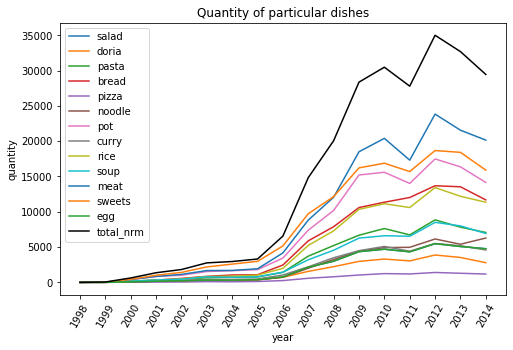

In [47]:
fig = plt.figure(figsize=(8.0, 5.0))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(dish_year_qty)):
    ax.plot(year, dish_year_qty[i], label=dish_names[i])
ax.set_xticklabels(year, rotation=60)
ax.set_title("Quantity of particular dishes")
ax.set_xlabel("year")
ax.set_ylabel("quantity")
ax.plot(year, total_user_adjusted, color="black", label="total_nrm")
ax.legend()

xaxis = ax.xaxis
xaxis.set_major_locator(ticker.FixedLocator(year))

plt.savefig("popular_dish.png")